In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [22]:
# read the data
data = pd.read_excel("../dataset/tumhisse.xlsx")

In [23]:
data.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,02-01-2012,0.02,0.02,0.02,0.02,112503,76,1.8678,513,93,50,38.0,20.0
1,03-01-2012,0.02,0.02,0.02,0.02,209590,76,1.8868,529,94,50,39.0,20.0
2,04-01-2012,0.02,0.02,0.02,0.02,205645,76,1.8709,515,92,49,38.0,20.0
3,05-01-2012,0.02,0.02,0.02,0.02,206178,76,1.8826,512,91,48,37.0,20.0
4,06-01-2012,0.02,0.02,0.02,0.02,246534,76,1.8786,502,90,48,37.0,20.0


In [24]:
# data na values
data.isna().sum()

Tarih                   0
Kapanış(TL)             0
Min(TL)                 1
Max(TL)                 0
AOF(TL)                 0
Hacim(TL)               0
Sermaye(mn TL)          0
USDTRY                  0
BIST 100                0
PiyasaDeğeri(mn TL)     0
PiyasaDeğeri(mn USD)    0
HalkaAçık PD(mn TL)     4
HalkaAçık PD(mn USD)    4
dtype: int64

In [25]:
# data describe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tarih                 3106 non-null   object 
 1   Kapanış(TL)           3106 non-null   float64
 2   Min(TL)               3105 non-null   float64
 3   Max(TL)               3106 non-null   float64
 4   AOF(TL)               3106 non-null   float64
 5   Hacim(TL)             3106 non-null   int64  
 6   Sermaye(mn TL)        3106 non-null   int64  
 7   USDTRY                3106 non-null   float64
 8   BIST 100              3106 non-null   int64  
 9   PiyasaDeğeri(mn TL)   3106 non-null   int64  
 10  PiyasaDeğeri(mn USD)  3106 non-null   int64  
 11  HalkaAçık PD(mn TL)   3102 non-null   float64
 12  HalkaAçık PD(mn USD)  3102 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 315.6+ KB


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kapanış(TL),3106.0,4.465631e+00,9.241328e+00,0.0200,0.060000,2.800000e-01,2.787500e+00,5.125000e+01
Min(TL),3105.0,4.359552e+00,8.992154e+00,0.0200,0.060000,2.700000e-01,2.720000e+00,4.900000e+01
Max(TL),3106.0,4.590589e+00,9.514335e+00,0.0200,0.070000,2.900000e-01,2.840000e+00,5.130000e+01
AOF(TL),3106.0,4.476062e+00,9.254201e+00,0.0200,0.060000,2.800000e-01,2.770000e+00,5.076000e+01
Hacim(TL),3106.0,2.091902e+08,4.967847e+08,16528.0000,552208.500000,2.675404e+06,9.534630e+07,5.774783e+09
Sermaye(mn TL),3106.0,5.014990e+02,8.177898e+02,76.0000,76.000000,7.600000e+01,2.280000e+02,2.530000e+03
USDTRY,3106.0,7.581933e+00,7.797780e+00,1.7424,2.423425,3.894350e+00,8.183400e+00,3.256820e+01
BIST 100,3106.0,1.788681e+03,2.074519e+03,498.0000,780.000000,9.600000e+02,1.414750e+03,1.064400e+04
PiyasaDeğeri(mn TL),3106.0,1.122258e+04,2.336191e+04,89.0000,193.000000,6.700000e+02,6.741750e+03,1.296630e+05
PiyasaDeğeri(mn USD),3106.0,6.374733e+02,1.082360e+03,47.0000,75.000000,1.390000e+02,7.960000e+02,6.962000e+03


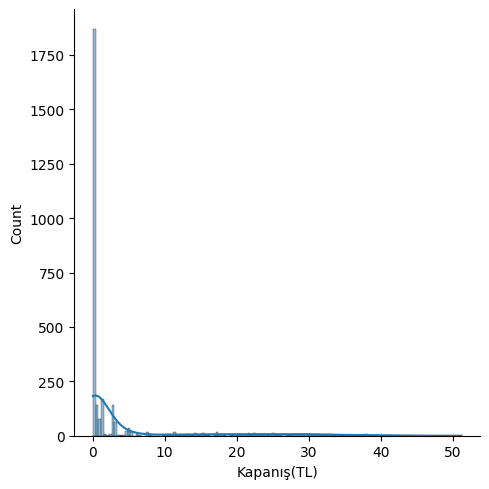

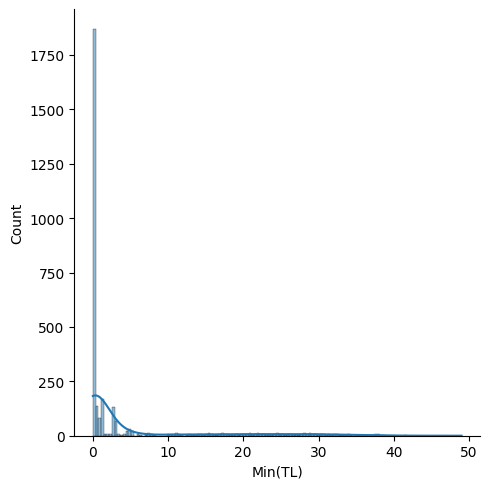

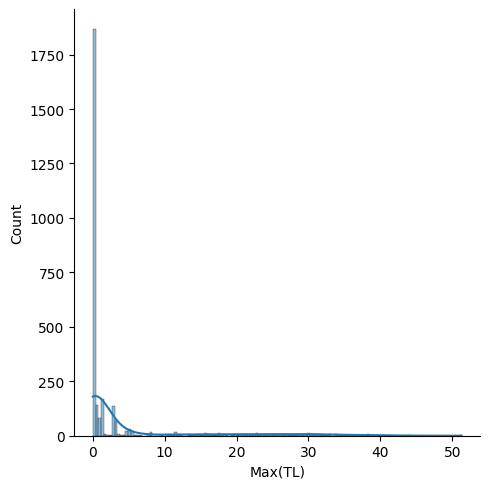

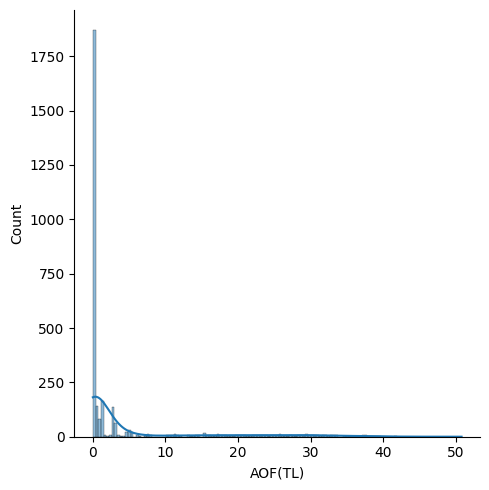

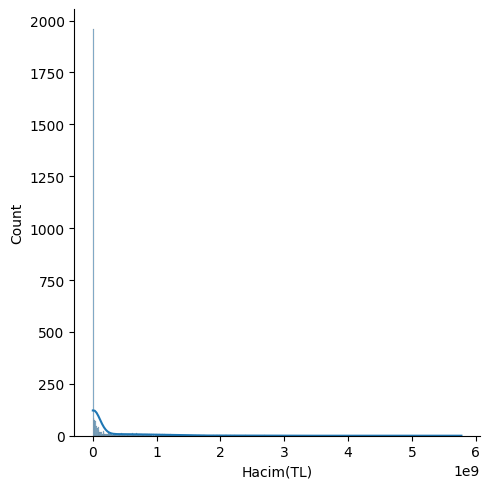

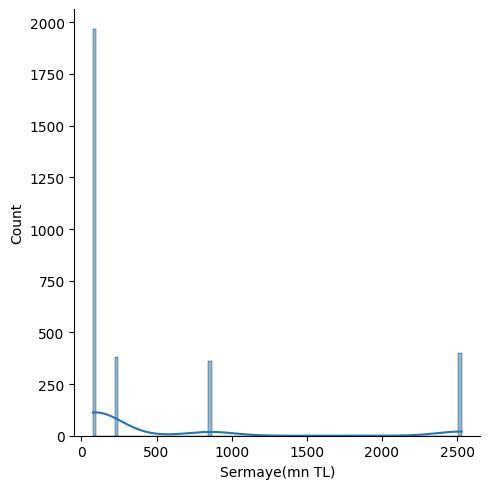

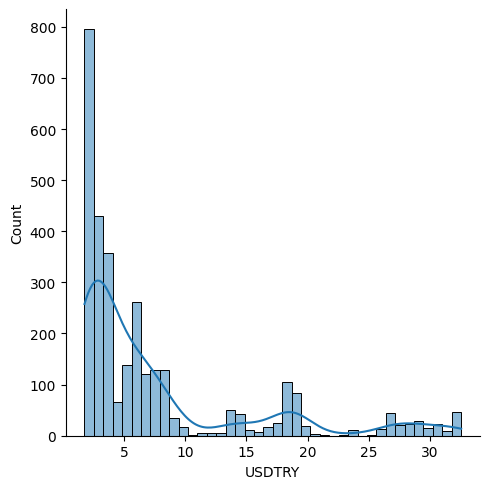

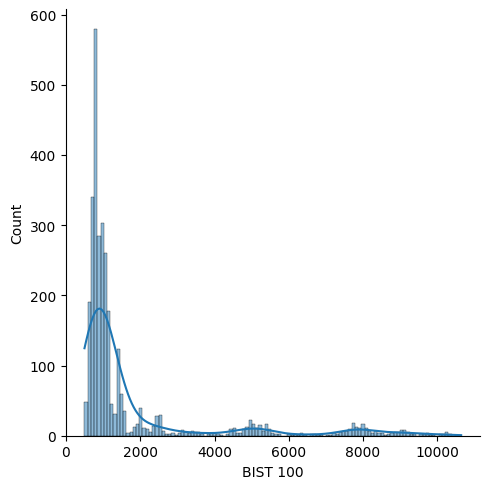

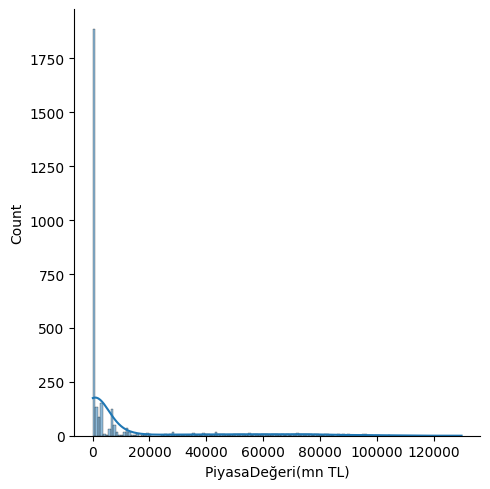

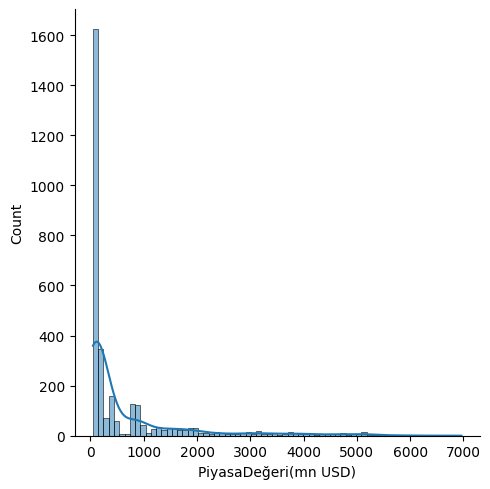

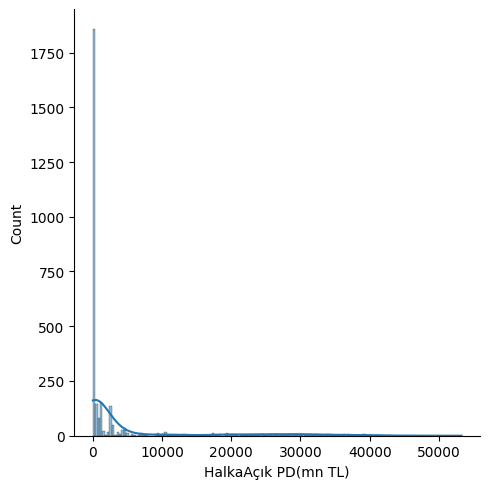

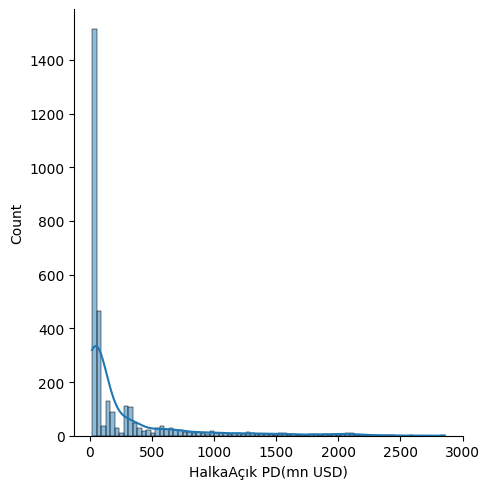

In [27]:
# data dist plot for na values
for i in data.describe().columns:
    sns.displot(data=data[i], kde=True)
    plt.show()

In [28]:
# mean using
data.isna().sum()

Tarih                   0
Kapanış(TL)             0
Min(TL)                 1
Max(TL)                 0
AOF(TL)                 0
Hacim(TL)               0
Sermaye(mn TL)          0
USDTRY                  0
BIST 100                0
PiyasaDeğeri(mn TL)     0
PiyasaDeğeri(mn USD)    0
HalkaAçık PD(mn TL)     4
HalkaAçık PD(mn USD)    4
dtype: int64

In [29]:
data["Min(TL)"].fillna(method="ffill", inplace=True)

/tmp/ipykernel_3499208/3452842596.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Min(TL)"].fillna(method="ffill", inplace=True)


In [30]:
data.fillna(method="ffill", inplace=True)

/tmp/ipykernel_3499208/3219607963.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


In [31]:
data.isna().sum()

Tarih                   0
Kapanış(TL)             0
Min(TL)                 0
Max(TL)                 0
AOF(TL)                 0
Hacim(TL)               0
Sermaye(mn TL)          0
USDTRY                  0
BIST 100                0
PiyasaDeğeri(mn TL)     0
PiyasaDeğeri(mn USD)    0
HalkaAçık PD(mn TL)     0
HalkaAçık PD(mn USD)    0
dtype: int64

In [32]:
# data visual
# target is close price
# index datetime
data.index = pd.to_datetime(data["Tarih"], dayfirst=True)

In [33]:
data.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,,
2012-01-02,02-01-2012,0.02,0.02,0.02,0.02,112503,76,1.8678,513,93,50,38.0,20.0
2012-01-03,03-01-2012,0.02,0.02,0.02,0.02,209590,76,1.8868,529,94,50,39.0,20.0
2012-01-04,04-01-2012,0.02,0.02,0.02,0.02,205645,76,1.8709,515,92,49,38.0,20.0
2012-01-05,05-01-2012,0.02,0.02,0.02,0.02,206178,76,1.8826,512,91,48,37.0,20.0
2012-01-06,06-01-2012,0.02,0.02,0.02,0.02,246534,76,1.8786,502,90,48,37.0,20.0


In [34]:
# drop tarih column
data.drop("Tarih", inplace=True, axis=1)

In [35]:
# copy the data
df = data.copy()

In [36]:
data.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,
2012-01-02,0.02,0.02,0.02,0.02,112503,76,1.8678,513,93,50,38.0,20.0
2012-01-03,0.02,0.02,0.02,0.02,209590,76,1.8868,529,94,50,39.0,20.0
2012-01-04,0.02,0.02,0.02,0.02,205645,76,1.8709,515,92,49,38.0,20.0
2012-01-05,0.02,0.02,0.02,0.02,206178,76,1.8826,512,91,48,37.0,20.0
2012-01-06,0.02,0.02,0.02,0.02,246534,76,1.8786,502,90,48,37.0,20.0


<Axes: xlabel='Tarih'>

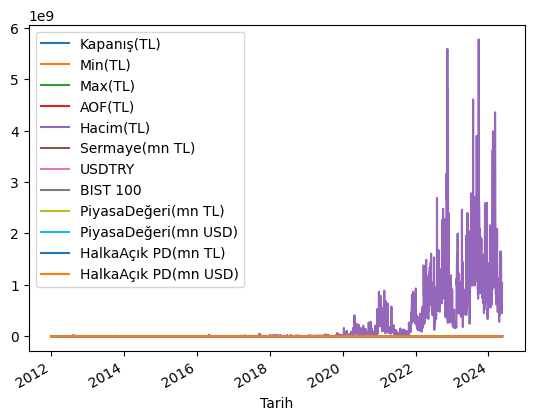

In [37]:
data.plot()

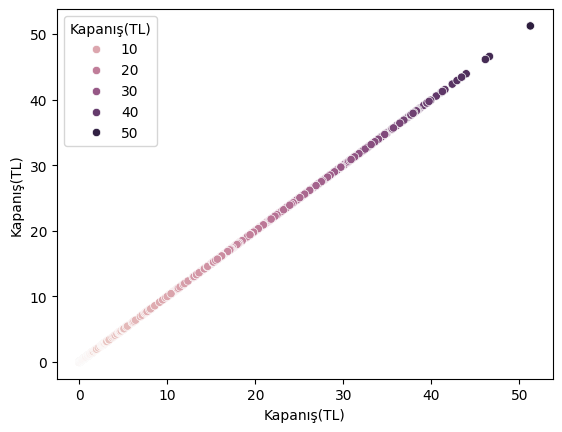

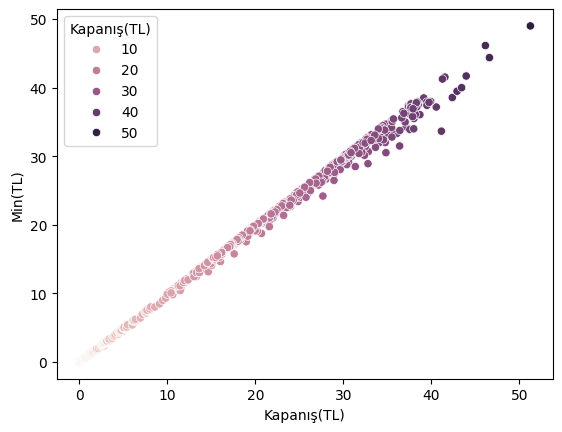

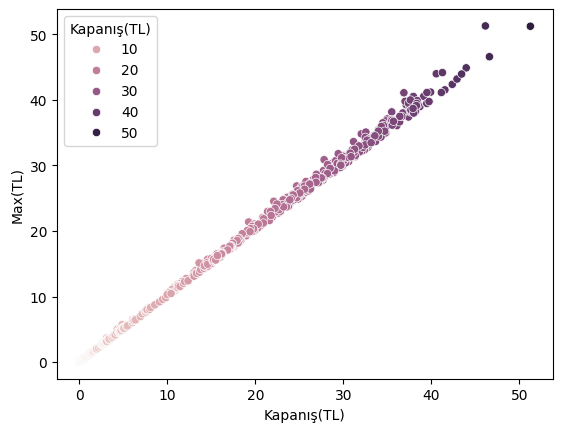

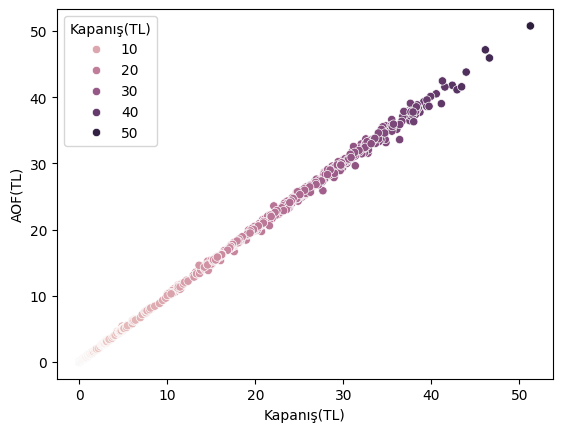

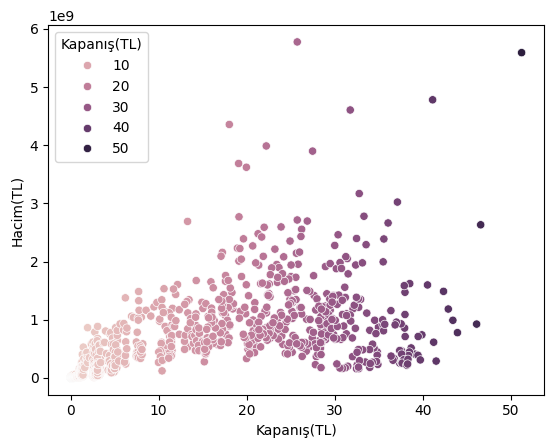

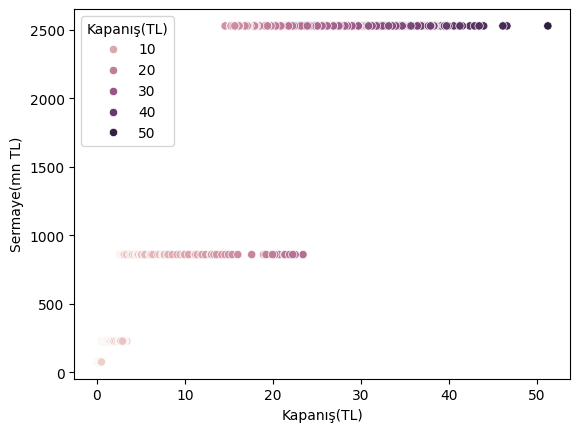

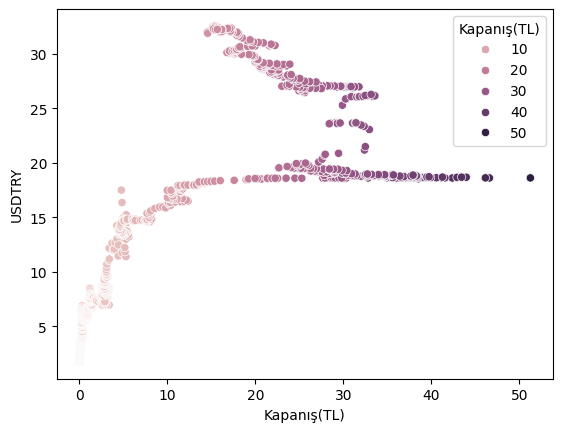

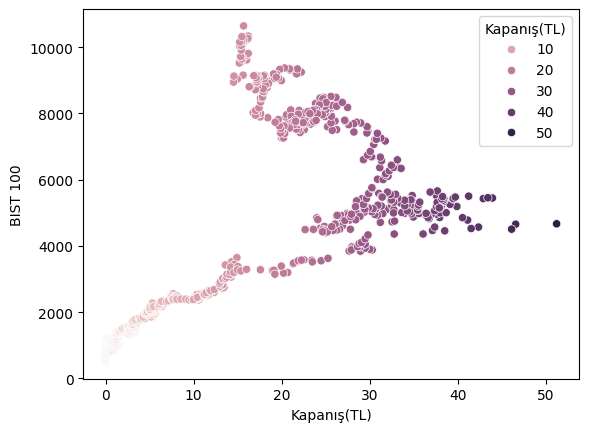

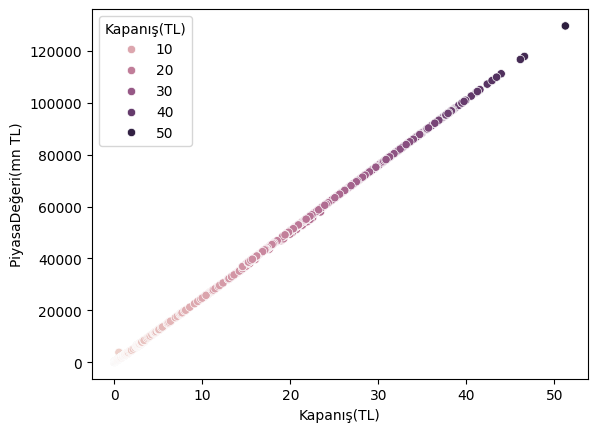

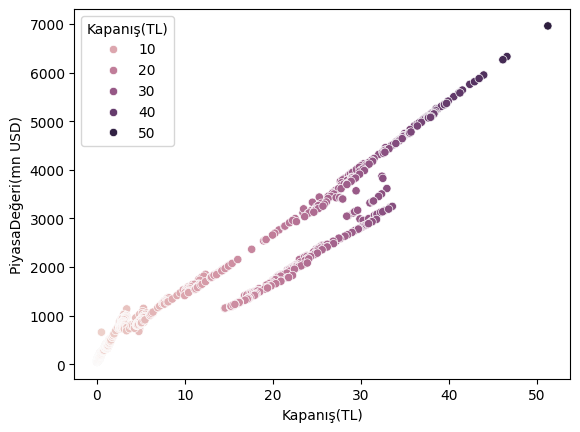

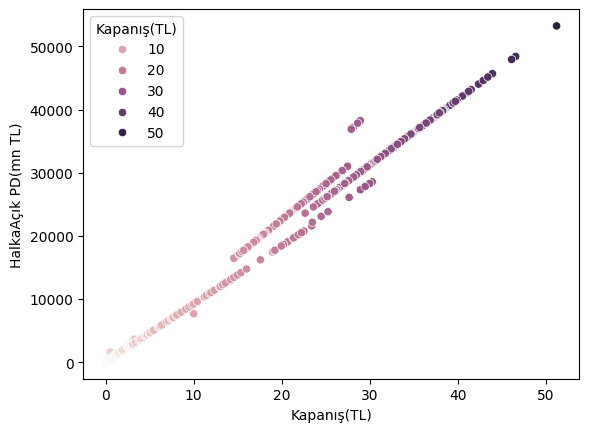

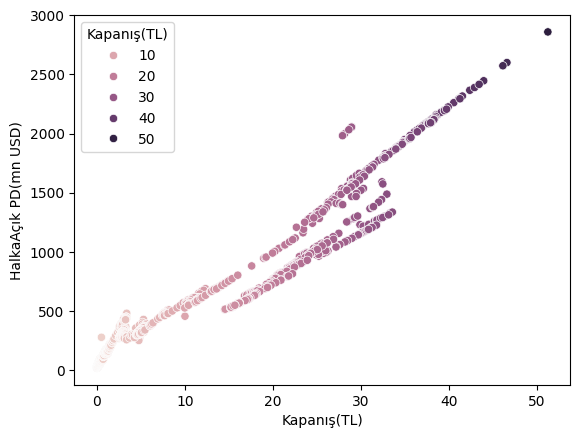

In [38]:
# scat plot
for i in df.columns:
    if i != "Kapanış(TL)	":
        sns.scatterplot(data=df, x="Kapanış(TL)", y=i,hue="Kapanış(TL)")
        plt.show()

In [75]:
# zigzag
ilocation_high = []
ilocation_down = []
for i in range(1, len(df["Kapanış(TL)"])):
    if df["Kapanış(TL)"].iloc[i] >= df["Kapanış(TL)"].iloc[i-1]:
        ilocation_high.append(df["Kapanış(TL)"].iloc[i])
        ilocation_down.append(np.nan)
    else:
        ilocation_down.append(df["Kapanış(TL)"].iloc[i-1])
        ilocation_high.append(np.nan)

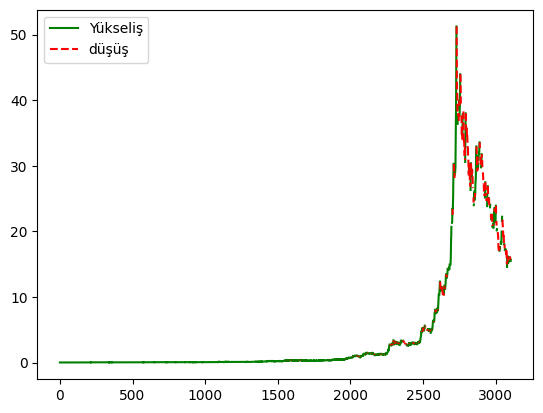

In [80]:
plt.plot(ilocation_high, label="Yükseliş", linestyle="-", color="green")
plt.plot(ilocation_down, label="düşüş", linestyle="--", color="red")
plt.legend()

In [83]:
# target
target_close_price_np = df["Kapanış(TL)"].values

In [92]:
# INDICATORS moveing average 7 days
df["MA-7"] = talib.MA(target_close_price_np,timeperiod=7)

In [93]:
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD),MA-7
Tarih,,,,,,,,,,,,,
2012-01-02,0.02,0.02,0.02,0.02,112503,76,1.8678,513,93,50,38.0,20.0,NaN
2012-01-03,0.02,0.02,0.02,0.02,209590,76,1.8868,529,94,50,39.0,20.0,NaN
2012-01-04,0.02,0.02,0.02,0.02,205645,76,1.8709,515,92,49,38.0,20.0,NaN
2012-01-05,0.02,0.02,0.02,0.02,206178,76,1.8826,512,91,48,37.0,20.0,NaN
2012-01-06,0.02,0.02,0.02,0.02,246534,76,1.8786,502,90,48,37.0,20.0,NaN


In [94]:
# willr indicator
df["willr"] = talib.WILLR(high=df["Max(TL)"].values, close=target_close_price_np, low=df["Min(TL)"].values)

In [97]:
# adx
df["adx"] = talib.ADX(high=df["Max(TL)"].values, close=target_close_price_np, low=df["Min(TL)"].values)

In [105]:
# rsi
df["rsi"] = talib.RSI(target_close_price_np)

In [108]:
# linear reg 
df["linreg"] = talib.LINEARREG(target_close_price_np)

In [109]:
# momentum
df["momentum"] = talib.MOM(target_close_price_np)

In [110]:
# ema
df["ema"] = talib.EMA(target_close_price_np)

In [111]:
df["cci"] = talib.CCI(high=df["Max(TL)"].values, close=target_close_price_np, low=df["Min(TL)"].values)

In [112]:
df.head()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD),MA-7,willr,adx,rsi,linreg,momentum,ema,cci
Tarih,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.02,0.02,0.02,0.02,112503,76,1.8678,513,93,50,38.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.02,0.02,0.02,0.02,209590,76,1.8868,529,94,50,39.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.02,0.02,0.02,0.02,205645,76,1.8709,515,92,49,38.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.02,0.02,0.02,0.02,206178,76,1.8826,512,91,48,37.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,0.02,0.02,0.02,0.02,246534,76,1.8786,502,90,48,37.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df.tail()

,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD),MA-7,willr,adx,rsi,linreg,momentum,ema,cci
Tarih,,,,,,,,,,,,,,,,,,,,
2024-05-13,15.41,15.39,15.82,15.60,444178249,2530,32.2075,10056,38987,1211,17392.0,540.0,15.924286,-83.941606,12.422451,42.462605,15.995714,-0.01,16.036776,-46.333333
2024-05-14,15.47,15.23,15.88,15.51,834463867,2530,32.2526,10173,39139,1214,17460.0,541.0,15.837143,-79.562044,11.970006,43.386706,15.904857,-0.07,16.000210,-49.251248
2024-05-15,15.25,15.24,15.68,15.45,493124013,2530,32.2877,10159,38583,1195,17208.0,533.0,15.770000,-95.620438,11.549878,40.799224,15.737429,0.03,15.951809,-79.026524
2024-05-16,15.50,15.26,15.57,15.42,620363989,2530,32.2152,10320,39215,1217,17490.0,543.0,15.668571,-77.372263,11.159760,44.825997,15.640857,-0.45,15.922660,-69.115192
2024-05-17,15.69,15.48,16.25,15.85,1032871088,2530,32.2520,10644,39696,1231,17704.0,549.0,15.600000,-63.503650,11.503631,47.735601,15.597714,-0.39,15.907650,10.226003


In [114]:
# copy the dataframe
process = df.copy()

<Axes: >

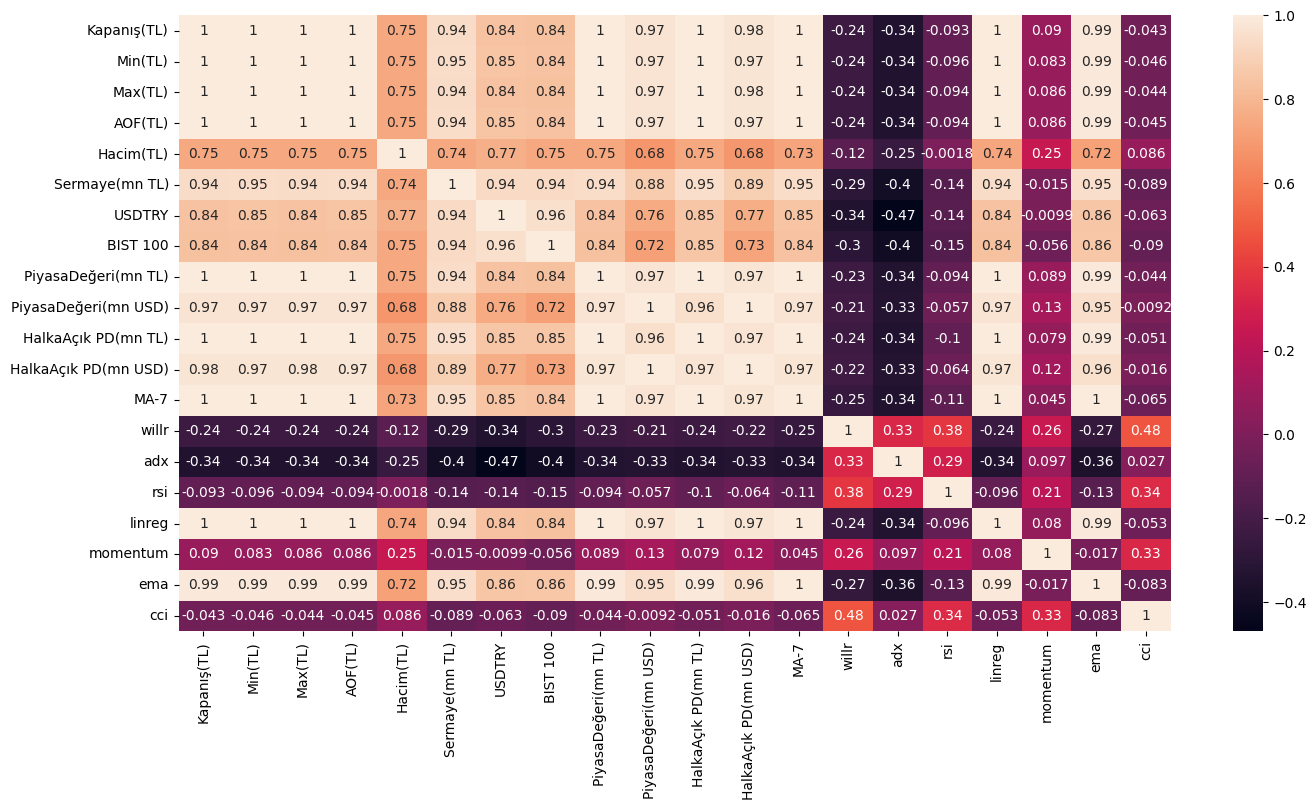

In [116]:
# process heatmap corr
plt.figure(figsize=(16, 8))
sns.heatmap(process.corr(), annot=True)

In [123]:
import ruptures as rpt

In [138]:
# pelt algo 
algo = rpt.Pelt(model="l2", min_size=30)
algo.fit(target_close_price_np)
results = algo.predict(pen=1)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

<Figure size 1600x800 with 0 Axes>

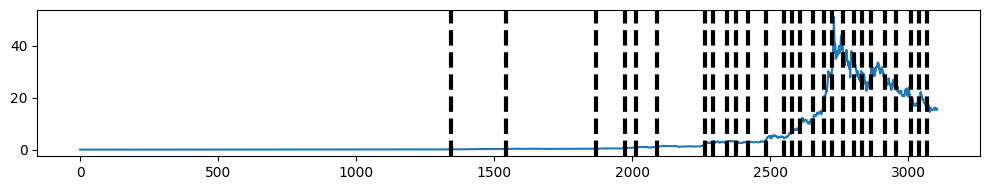

In [139]:
results
plt.figure(figsize=(16, 8))
rpt.display(target_close_price_np, [], results)

In [140]:
# drop the values from dataset

In [141]:
# Data Analysis is over...